In [1]:
import matplotlib.pyplot as plt
import string
from analysis import *

# Load and prepare data

In [2]:
# Load data
X_es = []
weights = []
for i in range(40, 40 + seeds_num):
    data = load_data("./data/seqlearn_cues_v4_seed{}.pickle".format(i))
    X_es.append(data["X_e"])
    weights.append(data["weights"])

In [3]:
# Helper function to transform stored weights into weight matrices
def weights_to_matrix(weights, clu_neurs):
    clu_neurs = np.concatenate(clu_neurs)
    W = np.zeros((N_e, N_e))
    W[~np.eye(N_e, dtype=bool)] = weights
    W = W[clu_neurs, :]
    W = W[:, clu_neurs]
    return W

# Helper function to get weight matrices for plotting
def get_Ws(X_es, weights):
    W_diff_clu = np.zeros((clu_num, clu_num))
    for i in range(len(X_es)):
        clu_neurs = get_cluster_neurons(X_es[i])
        weights_bf, weights_af = weights[i].T
        W_bf = weights_to_matrix(weights_bf, [np.arange(N_e)])
        W_af = weights_to_matrix(weights_af, [np.arange(N_e)])
        W_diff = W_af-W_bf
        for clu_a in range(clu_num):
            for clu_b in range(clu_num):
                W_diff_clu[clu_a, clu_b] += np.mean(W_diff[np.ix_(clu_neurs[clu_a], clu_neurs[clu_b])]) / len(X_es)
        if i==0:
            W_bf_seed0 = weights_to_matrix(weights_bf, clu_neurs)
            W_af_seed0 = weights_to_matrix(weights_af, clu_neurs)
    return W_bf_seed0.T, W_af_seed0.T, W_diff_clu.T

In [4]:
# Get weight matrices for plotting
W_bf_seed0, W_af_seed0, W_diff = get_Ws(X_es, weights)

# Figure

In [5]:
# Helper function to plot weights
def plot_weights(ax, W, cmap, cbar_label="Weight"):
    im = ax.imshow(W, cmap=cmap)
    plt.colorbar(im, ax=ax, label=cbar_label)
    ax.set_xlabel("From")
    ax.set_ylabel("To")

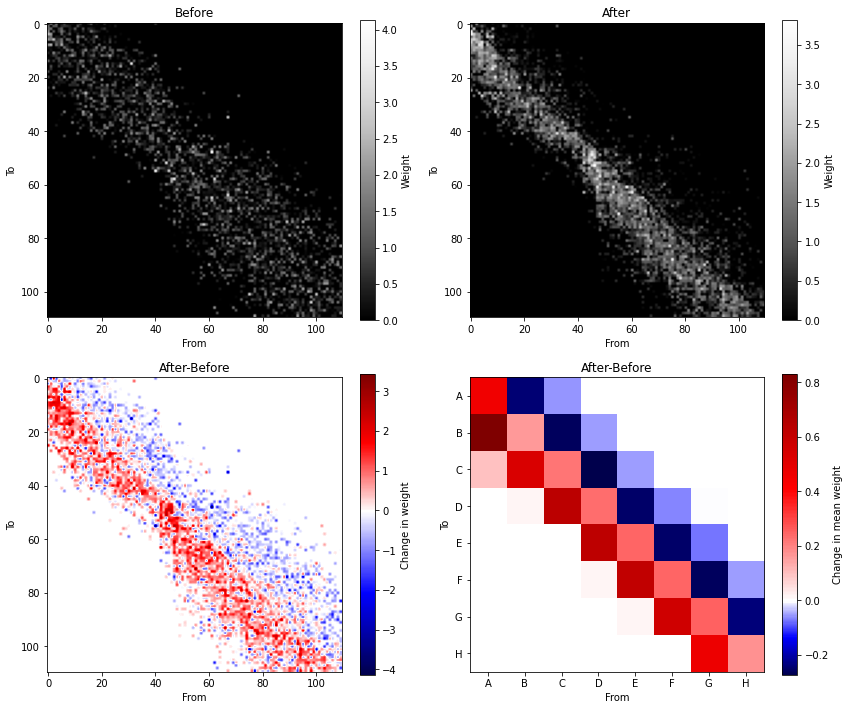

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Panel A
ax = axs[0, 0]
plot_weights(ax, W_bf_seed0, plt.get_cmap('Greys_r'))
ax.set_title("Before")

# Panel B
ax = axs[0, 1]
plot_weights(ax, W_af_seed0, plt.get_cmap('Greys_r'))
ax.set_title("After")

# Panel C
ax = axs[1, 0]
W_diff_seed0 = W_af_seed0-W_bf_seed0
midpoint = -W_diff_seed0.min()/(W_diff_seed0.max()-W_diff_seed0.min())
plot_weights(ax, W_diff_seed0, shiftedColorMap(plt.get_cmap('seismic'), midpoint=midpoint), "Change in weight")
ax.set_title("After-Before")

# Panel D
ax = axs[1, 1]
midpoint = -W_diff.min()/(W_diff.max()-W_diff.min())
plot_weights(ax, W_diff, shiftedColorMap(plt.get_cmap('seismic'), midpoint=midpoint), "Change in mean weight")
ax.set_xticks(np.arange(clu_num))
ax.set_yticks(np.arange(clu_num))
ax.set_xticklabels(string.ascii_uppercase[:8])
ax.set_yticklabels(string.ascii_uppercase[:8]) 
ax.set_title("After-Before")

fig.tight_layout()
plt.show()